# **Title of Project**
Big Sales Pridiction using Random Forest Regressor


# **Objective**
The objective of the "Big Sales Prediction" project is to develop a predictive model that accurately forecasts future sales based on historical data. By utilizing the Random Forest Regressor, this project aims to identify key factors that impact sales and generate insights to support business strategies. The model's predictions will enable businesses to optimize inventory levels, manage resources effectively, and enhance revenue forecasting, ultimately aiding in data-driven decision-making and reducing uncertainty in demand planning.


# **Data Source**
The dataset for the "Big Sales Prediction using Random Forest Regressor" project was obtained from the YBI Foundation GitHub repository and is named "Big Sales Data." This dataset includes historical sales information and other relevant features essential for building and training the Random Forest Regressor model.

**There are 12 variables in dataset**

1. Item_Identifier
2. Item_Weight
3. Item_Fat_Content
4. Item_Visibility
5. Item_Type
6. Item_MRP
7. Outlet_Identifier
8. Outlet_Establishment_Year
9. Outlet_Size
10. Outlet_Location_Type
11. Outlet_Type
12. Item_Outlet_Sales



# **Import Library**

In [197]:
import pandas as pd

In [198]:
import numpy as np

# **Import Data**

In [199]:
df = pd.read_csv("Big Sales Data.csv")

# **Describe Data**

In [200]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [202]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [203]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [204]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [206]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.790642,0.065953,141.004977,1997.830681,2185.836320
std,4.251186,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,922.135101
50%,12.800000,0.054021,142.247000,1999.000000,1768.287680
75%,16.000000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


# **Data Visualization**

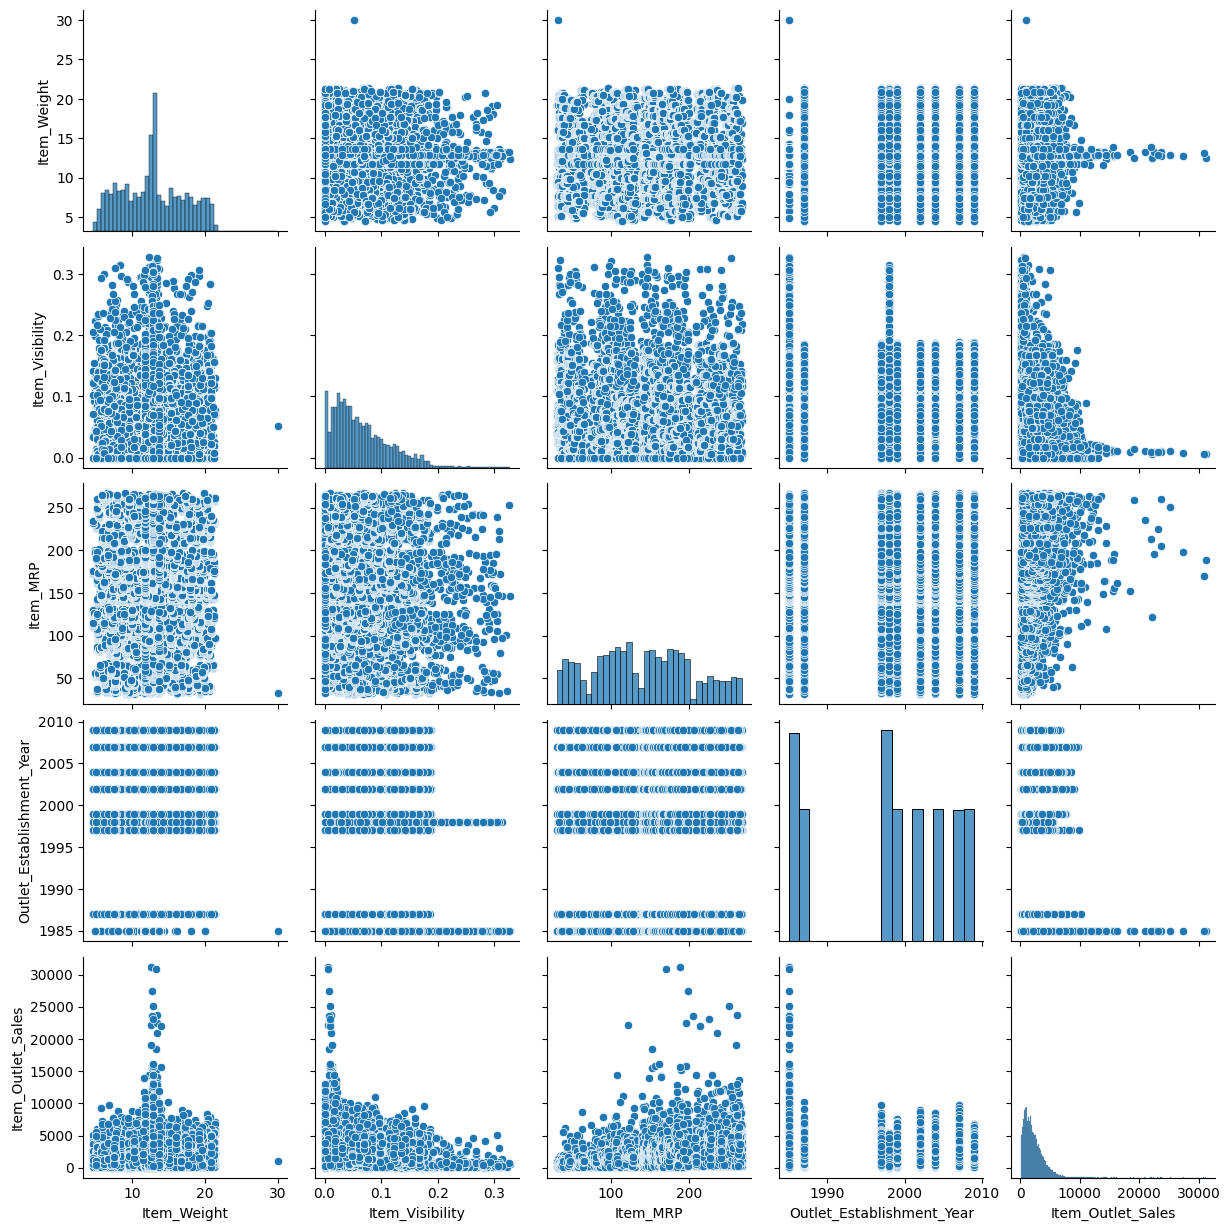

In [207]:
# Import library for visualization
import seaborn as sns
sns.pairplot(df)

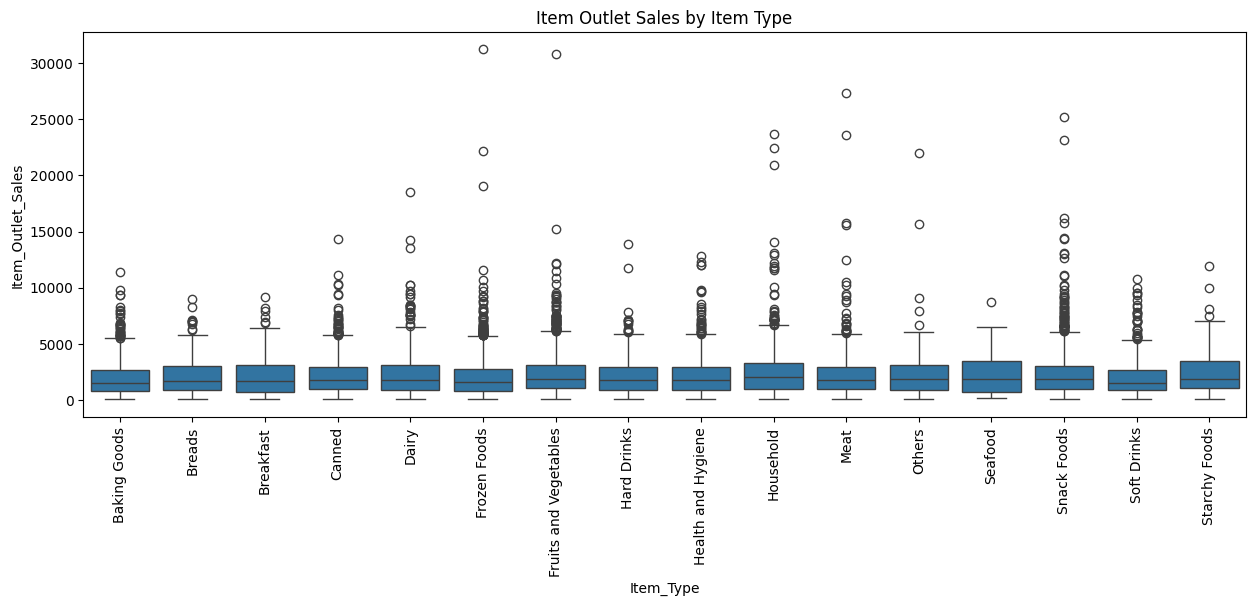

In [208]:
# Box plot
plt.figure(figsize=(15, 5))

sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation=90)
plt.title('Item Outlet Sales by Item Type')
plt.show()

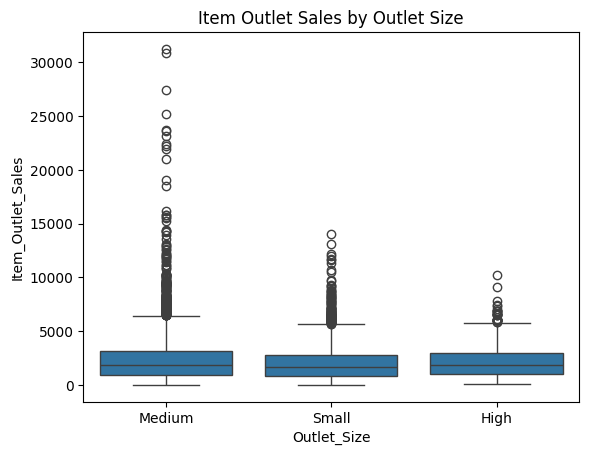

In [209]:
# Box plot
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
plt.title('Item Outlet Sales by Outlet Size')
plt.show()

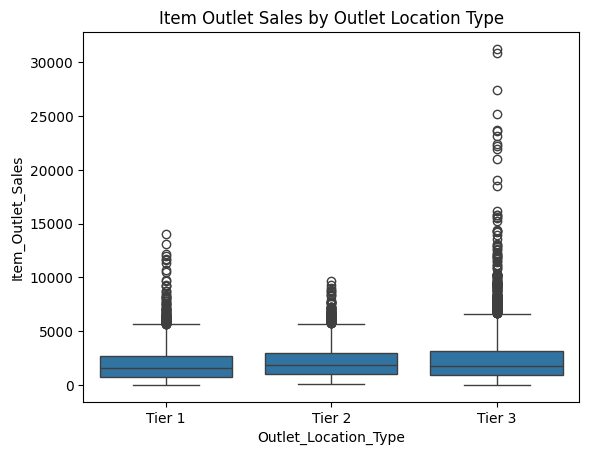

In [210]:
# Box plot
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
plt.title('Item Outlet Sales by Outlet Location Type')
plt.show()

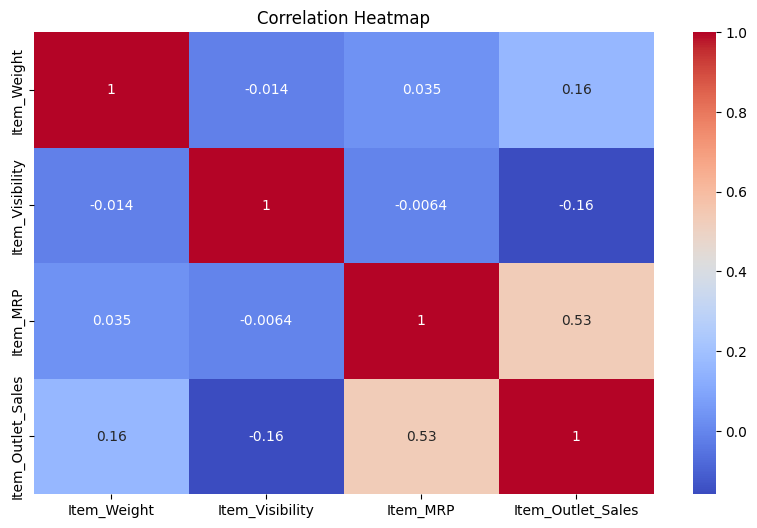

In [211]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

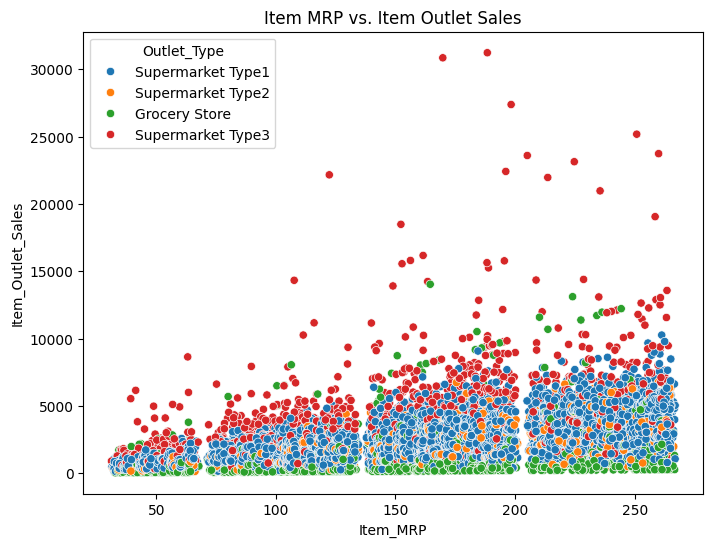

In [212]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, hue='Outlet_Type')
plt.title('Item MRP vs. Item Outlet Sales')
plt.show()

# **Data Preprocessing**

In [213]:
df[['Item_Identifier']].value_counts()

,count
Item_Identifier,
FDQ08,10
FDO24,10
FDQ19,10
FDQ28,10
FDQ31,10
...,...
FDM52,7
FDM50,7
FDL50,7


In [214]:
df[['Item_Fat_Content']].value_counts()

,count
Item_Fat_Content,
Low Fat,8485
Regular,4824
LF,522
reg,195
low fat,178


In [215]:
df.replace({'Item_Fat_Content': {'LF':'Low Fat', 'reg': 'Regular','low fat': 'Low Fat'}},inplace = True)

In [216]:
df[['Item_Fat_Content']].value_counts()

,count
Item_Fat_Content,
Low Fat,9185
Regular,5019


In [255]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'Low Fat': 0, 'Regular': 1}).astype(int)

In [218]:
df[['Item_Type']].value_counts()

,count
Item_Type,
Fruits and Vegetables,2013
Snack Foods,1989
Household,1548
Frozen Foods,1426
Dairy,1136
Baking Goods,1086
Canned,1084
Health and Hygiene,858
Meat,736


In [256]:
df['Item_Type'] = df['Item_Type'].replace({
    'Fruits and Vegetables': 0, 'Snack Foods': 0, 'Household': 1,
    'Frozen Foods': 0, 'Dairy': 0, 'Baking Goods': 0, 'Canned': 0,
    'Health and Hygiene': 1, 'Meat': 0, 'Soft Drinks': 0, 'Breads': 0,
    'Hard Drinks': 0, 'Others': 2, 'Starchy Foods': 0, 'Breakfast': 0,
    'Seafood': 0
}).astype(int)

In [220]:
df[['Item_Type']].value_counts()

,count
Item_Type,
0,11518
1,2406
2,280


In [221]:
df[['Outlet_Identifier']].value_counts()

,count
Outlet_Identifier,
OUT027,1559
OUT013,1553
OUT035,1550
OUT046,1550
OUT049,1550
OUT045,1548
OUT018,1546
OUT017,1543
OUT010,925


In [257]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].replace({
    'OUT027': 0, 'OUT013': 1, 'OUT035': 2, 'OUT046': 3, 'OUT049': 4,
    'OUT045': 5, 'OUT018': 6, 'OUT017': 7, 'OUT010': 8, 'OUT019': 9
}).astype(int)

In [223]:
df[['Outlet_Identifier']].value_counts()

,count
Outlet_Identifier,
0,1559
1,1553
2,1550
3,1550
4,1550
5,1548
6,1546
7,1543
8,925


In [224]:
df[['Outlet_Size']].value_counts()

,count
Outlet_Size,
Medium,7122
Small,5529
High,1553


In [258]:
df['Outlet_Size'] = df['Outlet_Size'].replace({'Small': 0, 'Medium': 1, 'High': 2}).astype(int)

In [226]:
df[['Outlet_Size']].value_counts()

,count
Outlet_Size,
1,7122
0,5529
2,1553


In [227]:
df[['Outlet_Location_Type']].value_counts()

,count
Outlet_Location_Type,
Tier 3,5583
Tier 2,4641
Tier 1,3980


In [259]:
df.replace({'Outlet_Location_Type': {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}},inplace = True)

In [229]:
df[['Outlet_Location_Type']].value_counts()

,count
Outlet_Location_Type,
2,5583
1,4641
0,3980


In [230]:
df[['Outlet_Type']].value_counts()

,count
Outlet_Type,
Supermarket Type1,9294
Grocery Store,1805
Supermarket Type3,1559
Supermarket Type2,1546


In [260]:
df['Outlet_Type'] = df['Outlet_Type'].replace({
    'Grocery Store': 0,
    'Supermarket Type1': 1,
    'Supermarket Type2': 2,
    'Supermarket Type3': 3
})

In [232]:
df[['Outlet_Type']].value_counts()

,count
Outlet_Type,
1,9294
0,1805
3,1559
2,1546


In [233]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,4,1999,1,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,1,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,1,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,0,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,1,1,1,352.874000


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.3+ MB


In [235]:
df.shape

(14204, 12)

# **Define Target y and x**

In [236]:
y = df['Item_Outlet_Sales']
x = df.drop(['Item_Outlet_Sales','Item_Identifier'], axis=1)

In [237]:
y.shape, x.shape

((14204,), (14204, 10))

In [238]:
y

,Item_Outlet_Sales
0,436.608721
1,443.127721
2,564.598400
3,1719.370000
4,352.874000
...,...
14199,4984.178800
14200,2885.577200
14201,2885.577200
14202,3803.676434


In [239]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.300000,0,0.111448,0,33.4874,4,1999,1,0,1
1,12.300000,0,0.111904,0,33.9874,7,2007,1,1,1
2,12.300000,0,0.111728,0,33.9874,6,2009,1,2,2
3,12.300000,0,0.000000,0,34.3874,9,1985,0,0,0
4,9.800000,1,0.045523,0,35.0874,7,2007,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,0,0.069606,0,261.9252,2,2004,0,1,1
14200,12.800000,0,0.070013,0,262.8252,7,2007,1,1,1
14201,12.800000,0,0.069561,0,263.0252,1,1987,2,2,1
14202,13.659758,0,0.069282,0,263.5252,0,1985,1,2,3


# **Standardizing X Variable**

In [240]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [241]:
x_std = df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]

In [242]:
x_std = sc.fit_transform(x_std)
x_std

array([[-0.11541705,  0.88413635, -1.73178716,  0.13968068],
       [-0.11541705,  0.89300616, -1.72373366,  1.09531886],
       [-0.11541705,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00220132,  0.07011952,  1.96538148, -1.29377659],
       [ 0.20444792,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00220132,  0.07334891,  1.97504569,  0.13968068]])

In [243]:
x[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']] = pd.DataFrame(x_std, columns=[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']] )


In [244]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.115417,0,0.884136,0,-1.731787,4,0.139681,1,0,1
1,-0.115417,0,0.893006,0,-1.723734,7,1.095319,1,1,1
2,-0.115417,0,0.889583,0,-1.723734,6,1.334228,1,2,2
3,-0.115417,0,-1.281712,0,-1.717291,9,-1.532686,0,0,0
4,-0.703509,1,-0.397031,0,-1.706016,7,1.095319,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,0.002201,0,0.070990,0,1.947664,2,0.736955,0,1,1
14200,0.002201,0,0.078898,0,1.962160,7,1.095319,1,1,1
14201,0.002201,0,0.070120,0,1.965381,1,-1.293777,2,2,1
14202,0.204448,0,0.064694,0,1.973435,0,-1.532686,1,2,3


# **Train Test Split**

In [245]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state=2529)

In [246]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12783, 10), (1421, 10), (12783,), (1421,))

# **Select a Model to Train**

In [247]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=2529)

In [248]:
model.fit(x_train, y_train)

RandomForestRegressor(random_state=2529)

# **Prediction**

In [249]:
y_predict = model.predict(x_test)

In [250]:
y_predict

array([1359.9474462 ,  689.72111819, 1859.80846766, ..., 2212.31316446,
       3344.32295034,  509.40814628])

# **Model Evaluation**

In [251]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
mean_squared_error(y_test, y_predict)

1613965.15465047

In [252]:
mean_absolute_error(y_test, y_predict)

827.783002565394

In [253]:
r2_score(y_test, y_predict)

0.5799088331861746

# **Actual Price Vs Predicted Price**

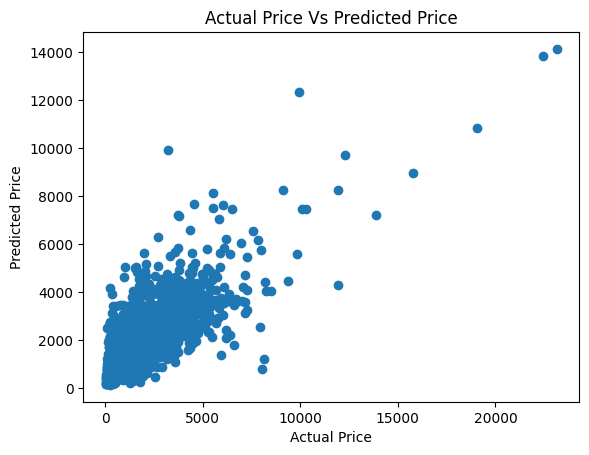

In [254]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

# **Explanation**
The Big Sales Prediction project leverages the Random Forest Regressor model to predict sales for various items across different retail outlets, using a dataset containing 14,204 rows of data on item characteristics (such as weight, fat content, and visibility) and outlet details (such as size, location, and type). The goal is to help businesses forecast sales more accurately, optimizing inventory, pricing, and marketing strategies. The project involves steps such as data preprocessing, feature engineering, model training, and evaluation using metrics like Mean Absolute Error (MAE) and R² score. The model’s insights can guide businesses in making data-driven decisions, and future work could include hyperparameter tuning or exploring advanced algorithms like XGBoost to improve accuracy further.